## KMeans clustering

The K-Means algorithm is a popular clustering technique used to partition a dataset into K distinct clusters. Here’s an in-depth look at how it works and what makes it useful:

## What is K-Means Clustering?
K-Means clustering aims to divide a dataset into K non-overlapping clusters, where each data point belongs to the cluster with the nearest mean. It’s an iterative algorithm that seeks to minimize the within-cluster variance.

Steps in the K-Means Algorithm
Initialize Centroids:

Randomly select K data points as initial cluster centroids (centers).

Alternatively, use the k-means++ method to initialize centroids more strategically.

Assign Data Points to Clusters:

Assign each data point to the nearest centroid based on Euclidean distance.

Update Centroids:

Calculate the mean of all data points assigned to each cluster and update the centroid positions.

Repeat:

Repeat steps 2 and 3 until the centroids no longer change significantly, or a maximum number of iterations is reached.

Mathematically
The objective is to minimize the sum of squared distances between data points and their corresponding cluster centroids. Formally, the objective function is:


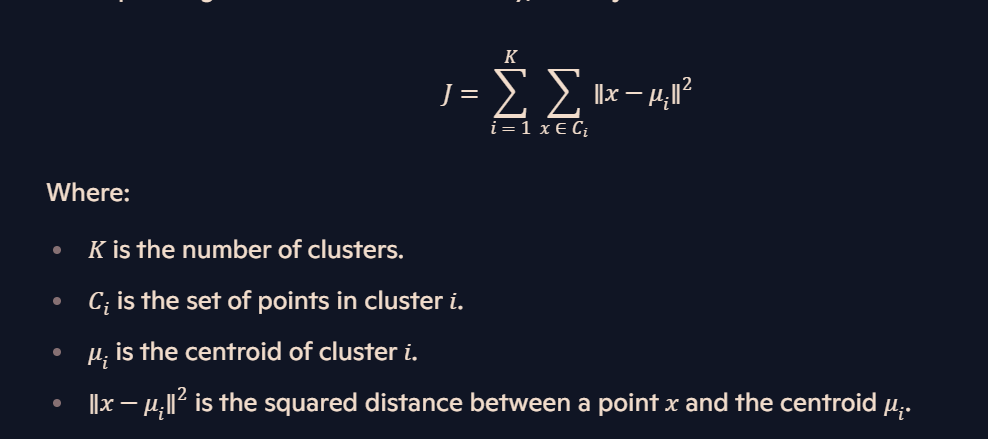

## Creating the dataset with five clusters

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=5, n_features=10, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data preprocessed and scaled.")

Data preprocessed and scaled.


# Visualizing the dataset using scatter plot 

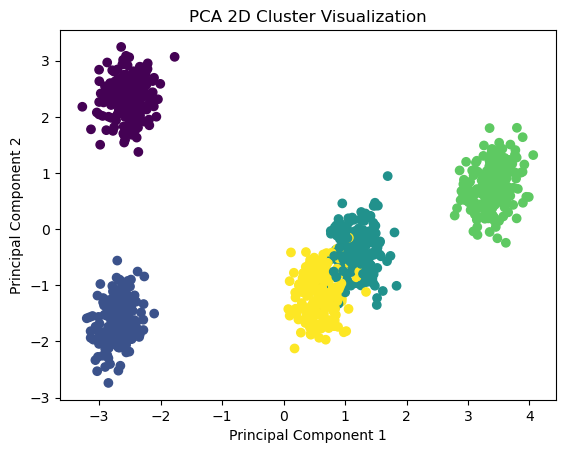

In [5]:
from sklearn.decomposition import PCA

# 2D Cluster Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA 2D Cluster Visualization')
plt.show()

# Finding optimal value of k using Elbow method

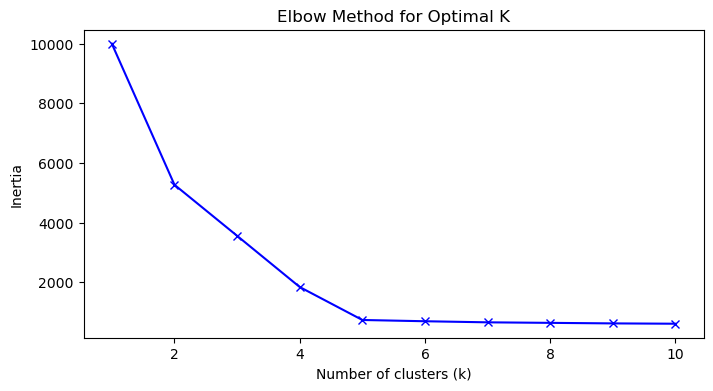

In [7]:
from sklearn.cluster import KMeans
import logging
logging.captureWarnings(True)

# Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Finding optimal value of k silhouette score

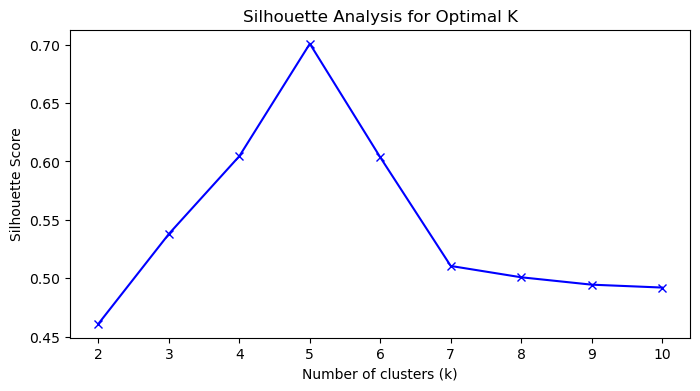

In [8]:
from sklearn.metrics import silhouette_score

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

# Finding optimal value of k using calinski harabasz score

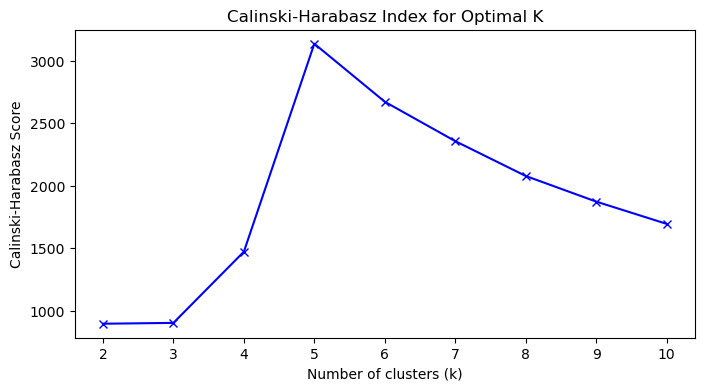

In [9]:
from sklearn.metrics import calinski_harabasz_score

# Calinski-Harabasz Index
ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    ch_scores.append(calinski_harabasz_score(X_scaled, labels))

# Plot Calinski-Harabasz Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), ch_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Index for Optimal K')
plt.show()

# After knowing optimal value of k, finding remaining best parameters

In [10]:
# Testing different initialization methods and parameters
best_k = 5  # Assuming the best K found from previous methods
init_methods = ['k-means++', 'random']
n_inits = [10, 20, 50]
max_iters = [100,200, 300, 500, 1000]

best_score = -1
best_params = None
for init in init_methods:
    for n_init in n_inits:
        for max_iter in max_iters:
            kmeans = KMeans(n_clusters=best_k, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
            labels = kmeans.fit_predict(X_scaled)
            score = silhouette_score(X_scaled, labels)
            print(f'Init: {init}, n_init: {n_init}, max_iter: {max_iter}, Silhouette Score: {score}')
            if score > best_score:
                best_score = score
                best_params = (init, n_init, max_iter)

print(f'Best Parameters: {best_params}, Best Silhouette Score: {best_score}')

Init: k-means++, n_init: 10, max_iter: 100, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 10, max_iter: 200, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 10, max_iter: 300, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 10, max_iter: 500, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 10, max_iter: 1000, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 20, max_iter: 100, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 20, max_iter: 200, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 20, max_iter: 300, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 20, max_iter: 500, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 20, max_iter: 1000, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 50, max_iter: 100, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 50, max_iter: 200, Silhouette Score: 0.7008034969822174
Init: k-means++, n_init: 5

In [11]:
kmeans = KMeans(n_clusters=best_k, init=list(best_params)[0], n_init=list(best_params)[1], max_iter=list(best_params)[2], random_state=42)
labels = kmeans.fit_predict(X_scaled)
print("silhouette_score is: ", silhouette_score(X_scaled, labels))

silhouette_score is:  0.7008034969822174


In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Evaluation Metrics
silhouette = silhouette_score(X_scaled, labels)
ch_score = calinski_harabasz_score(X_scaled, labels)
db_score = davies_bouldin_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette}')
print(f'Calinski-Harabasz Score: {ch_score}')

Silhouette Score: 0.7008034969822174
Calinski-Harabasz Score: 3135.9669562641625


# Understanding Results:

Elbow curve: Look for the "elbow" point.
Silhouette score: Higher is better (max 1.0).
Calinski-Harabasz: Higher is better.
Gap statistic: Look for maximum value.
Stability: Higher indicates more stable clusters.


# Best Practices:

Always scale your data first.
Try multiple k values in a reasonable range.
Consider cluster stability for production use.
Use multiple metrics for validation.
Check visualization for cluster separation.